In [270]:
import numpy as np # For Linear Algebra
import pandas as pd # To Work With Data
# for visualizations
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime # Time Series analysis.

In [271]:
df = pd.read_csv("Weather.csv")

In [272]:
df.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [273]:
#Removing  first column
df = pd.read_csv("Weather.csv", index_col=0)

In [274]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [275]:
df1 = pd.melt(df,id_vars='YEAR', value_vars=df.columns[1:]) ## This will melt the data
df1.head() 

,YEAR,variable,value
0,1901,JAN,17.99
1,1902,JAN,19.00
2,1903,JAN,18.32
3,1904,JAN,17.77
4,1905,JAN,17.40


In [276]:
df1["Date"]=df1['variable']+ ' '+df1['YEAR'].astype(str)

In [277]:
df1

,YEAR,variable,value,Date
0,1901,JAN,17.99,JAN 1901
1,1902,JAN,19.00,JAN 1902
2,1903,JAN,18.32,JAN 1903
3,1904,JAN,17.77,JAN 1904
4,1905,JAN,17.40,JAN 1905
...,...,...,...,...
1399,2013,DEC,19.69,DEC 2013
1400,2014,DEC,19.50,DEC 2014
1401,2015,DEC,20.21,DEC 2015
1402,2016,DEC,21.89,DEC 2016


In [278]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      1404 non-null   int64  
 1   variable  1404 non-null   object 
 2   value     1404 non-null   float64
 3   Date      1404 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 44.0+ KB


In [279]:
df1.loc[:,'Date'] = df1['Date'].apply(lambda x : datetime.strptime(x, '%b %Y'))


In [280]:
df1.head()

,YEAR,variable,value,Date
0,1901,JAN,17.99,1901-01-01 00:00:00
1,1902,JAN,19.00,1902-01-01 00:00:00
2,1903,JAN,18.32,1903-01-01 00:00:00
3,1904,JAN,17.77,1904-01-01 00:00:00
4,1905,JAN,17.40,1905-01-01 00:00:00


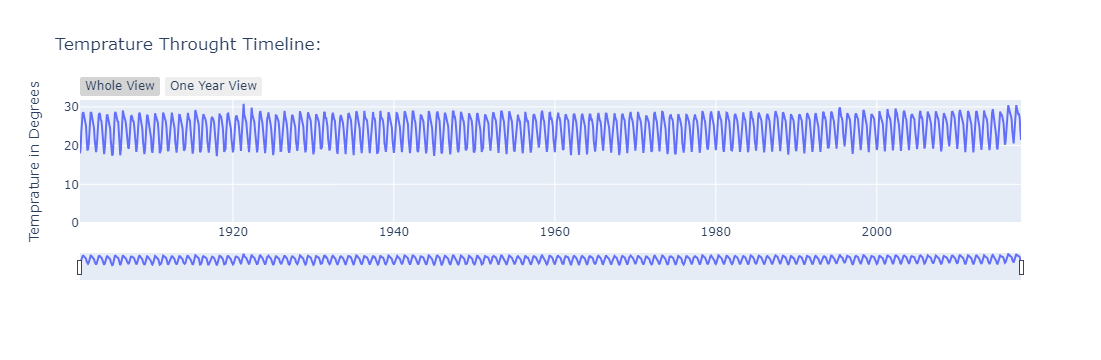

In [281]:
df1.columns=['Year', 'Month', 'Temprature', 'Date']
df1.sort_values(by='Date', inplace=True) ## To get the time series right.
fig = go.Figure(layout = go.Layout(yaxis=dict(range=[0, df1['Temprature'].max()+1])))
fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Temprature']), )
fig.update_layout(title='Temprature Throught Timeline:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.update_layout(xaxis=go.layout.XAxis(
    rangeselector=dict(
        buttons=list([dict(label="Whole View", step="all"),
                      dict(count=1,label="One Year View",step="year",stepmode="todate")                      
                     ])),
        rangeslider=dict(visible=True),type="date")
)
fig.show()

In [282]:
df1.head()

,Year,Month,Temprature,Date
0,1901,JAN,17.99,1901-01-01 00:00:00
117,1901,FEB,19.43,1901-02-01 00:00:00
234,1901,MAR,23.49,1901-03-01 00:00:00
351,1901,APR,26.41,1901-04-01 00:00:00
468,1901,MAY,28.28,1901-05-01 00:00:00


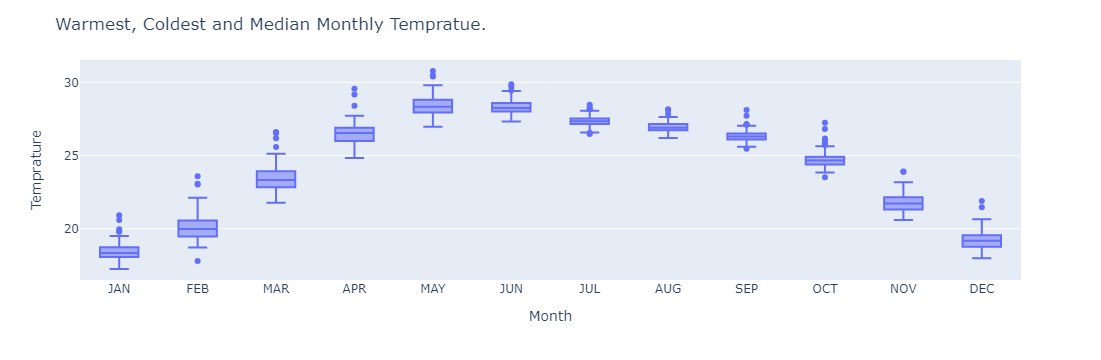

In [283]:
fig = px.box(df1, 'Month', 'Temprature')
fig.update_layout(title='Warmest, Coldest and Median Monthly Tempratue.')
fig.show()

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

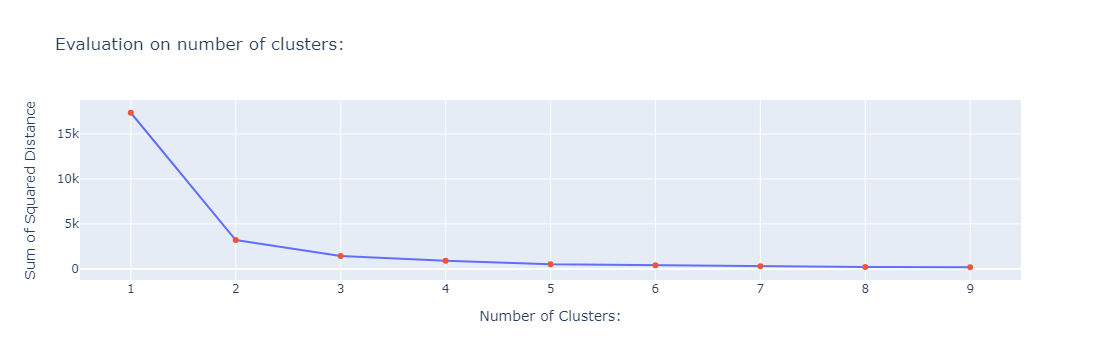

In [284]:
from sklearn.cluster import KMeans
sse = []
target = df1['Temprature'].to_numpy().reshape(-1,1)
num_clusters = list(range(1, 10))

for k in num_clusters:
    km = KMeans(n_clusters=k)
    km.fit(target)
    sse.append(km.inertia_)

fig = go.Figure(data=[
    go.Scatter(x = num_clusters, y=sse, mode='lines'),
    go.Scatter(x = num_clusters, y=sse, mode='markers')
])

fig.update_layout(title="Evaluation on number of clusters:",
                 xaxis_title = "Number of Clusters:",
                 yaxis_title = "Sum of Squared Distance",
                 showlegend=False)
fig.show()

In [285]:
df1.head()

,Year,Month,Temprature,Date
0,1901,JAN,17.99,1901-01-01 00:00:00
117,1901,FEB,19.43,1901-02-01 00:00:00
234,1901,MAR,23.49,1901-03-01 00:00:00
351,1901,APR,26.41,1901-04-01 00:00:00
468,1901,MAY,28.28,1901-05-01 00:00:00


C:\Users\antuk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



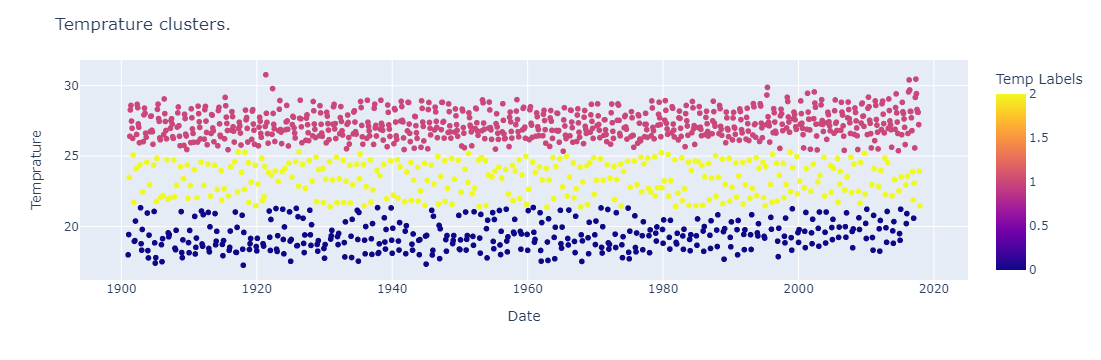

In [286]:
km = KMeans(3)
km.fit(df1['Temprature'].to_numpy().reshape(-1,1))
df1.loc[:,'Temp Labels'] = km.labels_
fig = px.scatter(df1, 'Date', 'Temprature', color='Temp Labels')
fig.update_layout(title = "Temprature clusters.",
                 xaxis_title="Date", yaxis_title="Temprature")
fig.show()

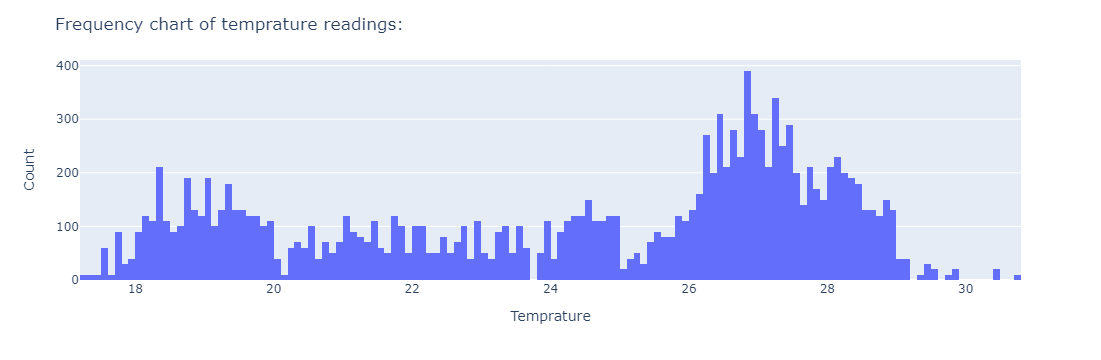

In [287]:
fig = px.histogram(x=df1['Temprature'], nbins=200, histnorm='density')
fig.update_layout(title='Frequency chart of temprature readings:',
                 xaxis_title='Temprature', yaxis_title='Count')

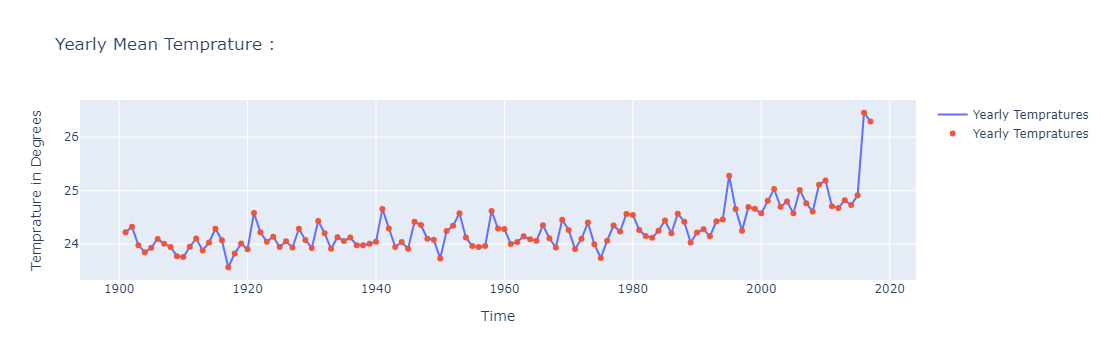

In [288]:
df['Yearly Mean'] = df.iloc[:,1:].mean(axis=1) ## Axis 1 for row wise and axis 0 for columns.
fig = go.Figure(data=[
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='lines'),
    go.Scatter(name='Yearly Tempratures' , x=df['YEAR'], y=df['Yearly Mean'], mode='markers')
])
fig.update_layout(title='Yearly Mean Temprature :',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()

In [289]:
df1.head()

,Year,Month,Temprature,Date,Temp Labels
0,1901,JAN,17.99,1901-01-01 00:00:00,0
117,1901,FEB,19.43,1901-02-01 00:00:00,0
234,1901,MAR,23.49,1901-03-01 00:00:00,2
351,1901,APR,26.41,1901-04-01 00:00:00,1
468,1901,MAY,28.28,1901-05-01 00:00:00,1


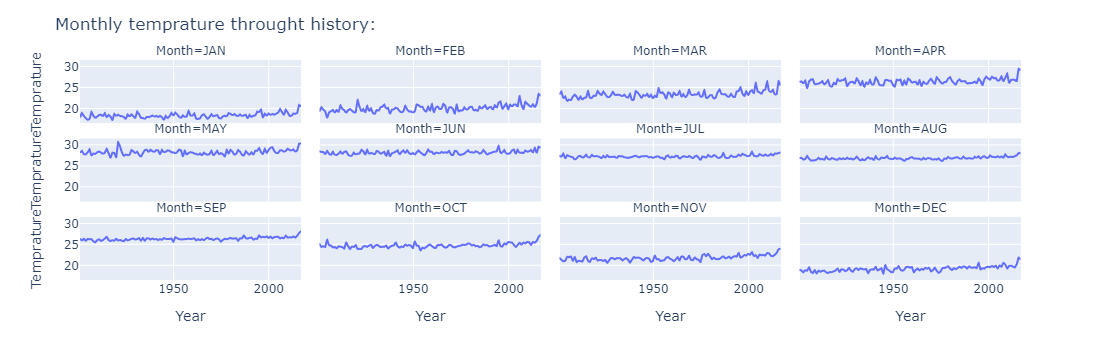

In [290]:
fig = px.line(df1, 'Year', 'Temprature', facet_col='Month', facet_col_wrap=4)
fig.update_layout(title='Monthly temprature throught history:')
fig.show()

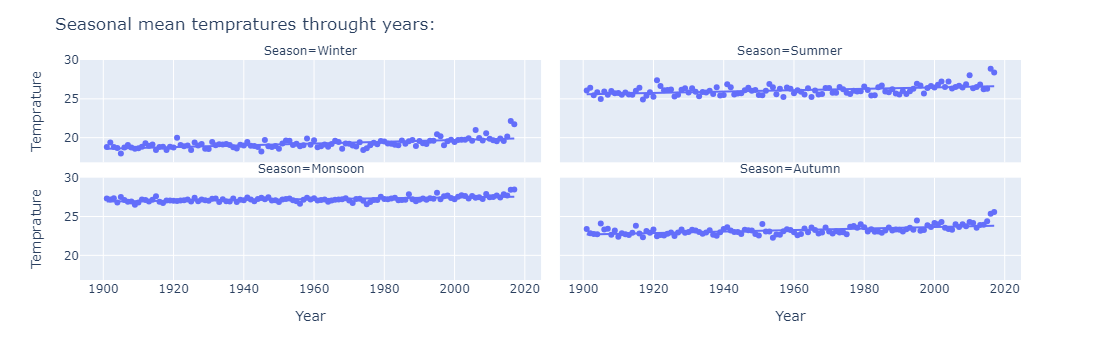

In [291]:
df['Winter'] = df[['DEC', 'JAN', 'FEB']].mean(axis=1)
df['Summer'] = df[['MAR', 'APR', 'MAY']].mean(axis=1)
df['Monsoon'] = df[['JUN', 'JUL', 'AUG', 'SEP']].mean(axis=1)
df['Autumn'] = df[['OCT', 'NOV']].mean(axis=1)
seasonal_df = df[['YEAR', 'Winter', 'Summer', 'Monsoon', 'Autumn']]
seasonal_df = pd.melt(seasonal_df, id_vars='YEAR', value_vars=seasonal_df.columns[1:])
seasonal_df.columns=['Year', 'Season', 'Temprature']

fig = px.scatter(seasonal_df, 'Year', 'Temprature', facet_col='Season', facet_col_wrap=2, trendline='ols')
fig.update_layout(title='Seasonal mean tempratures throught years:')
fig.show()

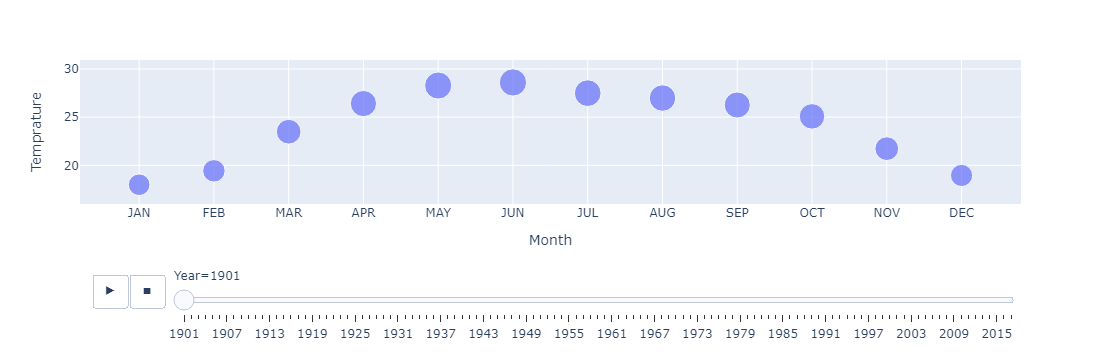

In [292]:
px.scatter(df1, 'Month', 'Temprature', size='Temprature', animation_frame='Year')

In [293]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

df2 = df1[['Year', 'Month', 'Temprature']].copy()
df2 = pd.get_dummies(df2)
y = df2[['Temprature']]
x = df2.drop(columns='Temprature')

dtr = DecisionTreeRegressor()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)
dtr.fit(train_x, train_y)
pred = dtr.predict(test_x)
r2_score(test_y, pred)

0.9567480916007779

In [294]:
next_Year = df1[df1['Year']==2017][['Year', 'Month']]
next_Year.Year.replace(2017,2018, inplace=True)
next_Year= pd.get_dummies(next_Year)
temp_2018 = dtr.predict(next_Year)

temp_2018 = {'Month':df1['Month'].unique(), 'Temprature':temp_2018}
temp_2018=pd.DataFrame(temp_2018)
temp_2018['Year'] = 2018
temp_2018

,Month,Temprature,Year
0,JAN,20.59,2018
1,FEB,23.08,2018
2,MAR,26.61,2018
3,APR,28.11,2018
4,MAY,28.82,2018
5,JUN,29.44,2018
6,JUL,28.18,2018
7,AUG,27.64,2018
8,SEP,28.11,2018
9,OCT,27.24,2018


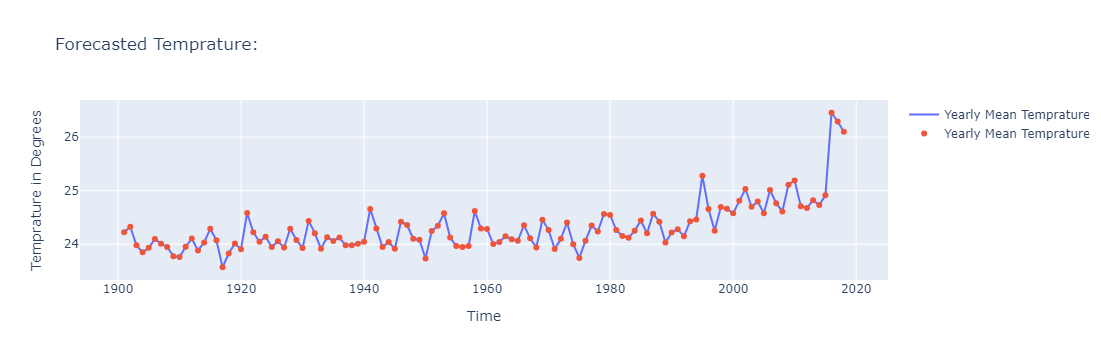

In [295]:
forecasted_temp = pd.concat([df1,temp_2018], sort=False).groupby(by='Year')['Temprature'].mean().reset_index()
fig = go.Figure(data=[
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp['Year'], y=forecasted_temp['Temprature'], mode='lines'),
    go.Scatter(name='Yearly Mean Temprature', x=forecasted_temp ['Year'], y=forecasted_temp['Temprature'], mode='markers')
])
fig.update_layout(title='Forecasted Temprature:',
                 xaxis_title='Time', yaxis_title='Temprature in Degrees')
fig.show()